In [131]:
PATH = "./outputs"
SUBFOLDERS = ["wellbeing", "achievement", "delinquency", "ptsd"]
LABELS = ["gpt-5-mini", "Phi-4", "Qwen-3-30B", "Llama-3.3-70B", "Magistral-Small", "Qwen-Next-80B"]
GROLTS_LABELS_OLD = ["1","2","3a","3b","3c","4","5","6a","6b","7","8","9","10","11","12","13","14a","14b","14c","15","16"]
GROLTS_LABELS_NEW = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18"]

In [132]:
%matplotlib inline
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set the style
sns.set_theme(style="whitegrid")

# Set general plot parameters for Overleaf (1-column A4)
plt.rcParams.update(
    {
        "figure.figsize": (3.3, 2.5),  # inches, ~1-column width
        "axes.titlesize": 16,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 14,
        "pdf.fonttype": 42,  # vector fonts
        "ps.fonttype": 42,
    }
)

In [133]:
def load_llm_accuracies(df_labels, files):
    data = {}

    for f in files:
        df = pd.read_csv(f"{PATH}/{f}")
        filename = os.path.basename(f).replace(".csv", "")
        df_merged = df.merge(
            df_labels, on=["paper_id", "question_id"], suffixes=("_pred", "_true")
        )
        df_merged["correct"] = (df_merged["answer_pred"] == df_merged["answer_true"]).astype(int)
        acc = df_merged.groupby("question_id")["correct"].mean()
        data[filename] = acc

    acc_df = pd.DataFrame(data).sort_index()

    return acc_df


def plot_mapped_accuracy_heatmaps(acc_df, subfolder):
    # Sort for consistent mapping
    acc_df = acc_df.sort_index()

    plt.figure(figsize=(8, 5))  # wider to fit new column
    ax = sns.heatmap(
        acc_df,
        vmin=0,
        vmax=1,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        cbar=True,
        cbar_kws={"label": "Accuracy / Proportion of 1's", "pad": 0.1},
        annot=True,
        annot_kws={"size": 14},
        fmt=".2f",
    )
    ax.set_title(f"Per-Question Accuracy Comparison ({subfolder.capitalize()})")
    ax.set_xticklabels(LABELS, ha="center", rotation=30)
    plt.yticks(rotation=0)

    plt.tight_layout()
    plt.savefig(f"./viz/{subfolder}_comparison.pdf", bbox_inches="tight")
    plt.show()

    

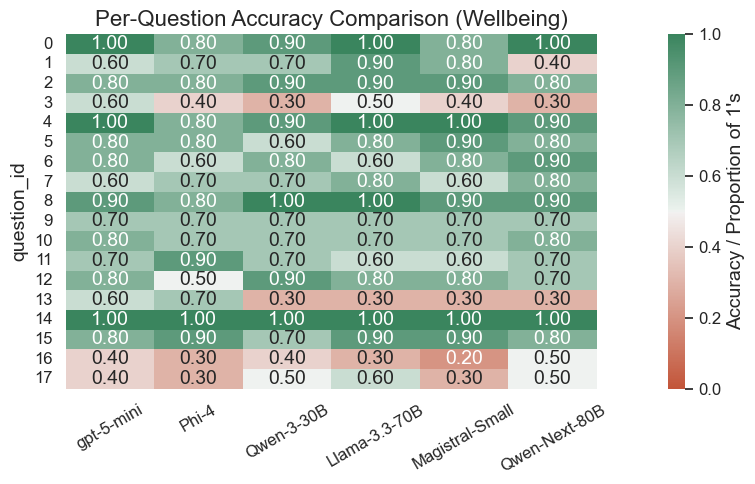

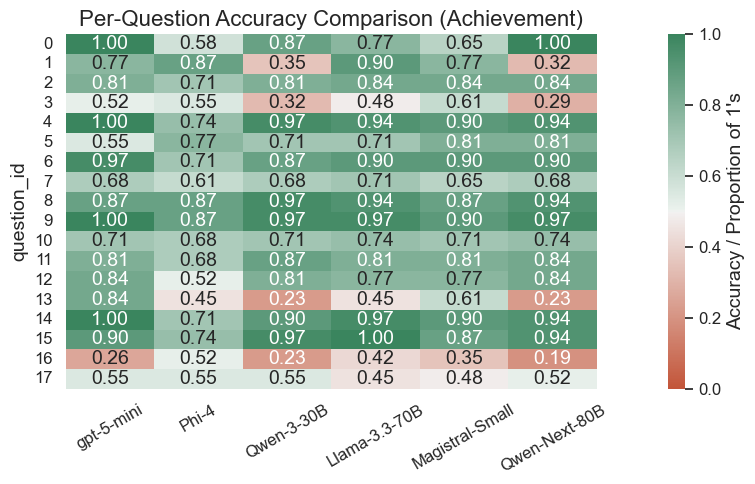

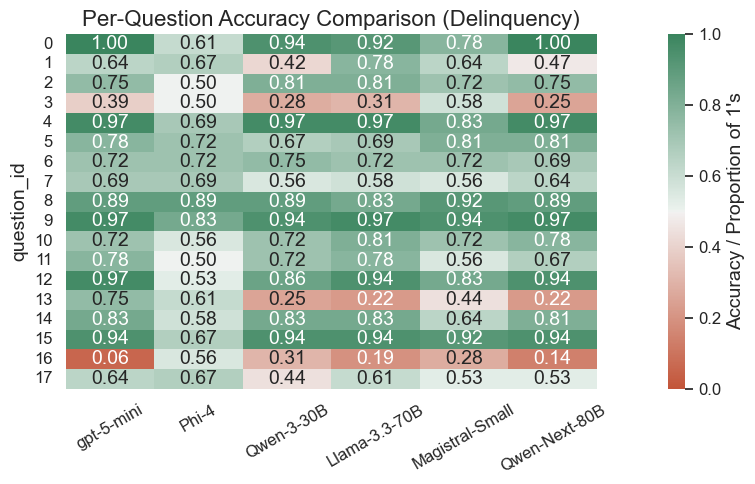

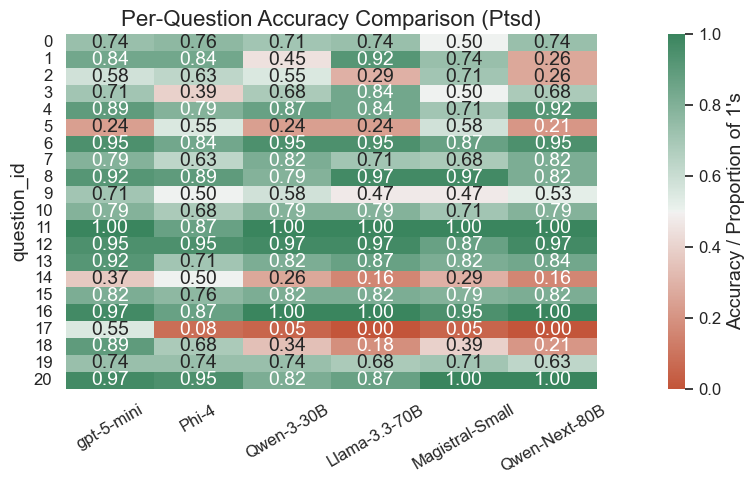

In [134]:
acc_dfs = []
# Load labels
for subfolder in SUBFOLDERS:
    df_labels = pd.read_csv(f"./human_labels/{subfolder}.csv", delimiter=";", dtype=int)
    df_labels = df_labels.melt(
        id_vars=["paper_id"], var_name="question_id", value_name="answer"
    )
    df_labels["paper_id"] = df_labels["paper_id"].astype(int)
    df_labels["question_id"] = df_labels["question_id"].astype(int)
    df_labels["answer"] = df_labels["answer"].astype(int)


    files = [
        f"Qwen_Qwen3-Embedding-8B_gpt-5-mini_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_microsoft_phi-4_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
    ]
    

    acc_df = load_llm_accuracies(df_labels, files)
    plot_mapped_accuracy_heatmaps(acc_df, subfolder)
    acc_dfs.append(acc_df)

In [135]:
for i, acc_df in enumerate(acc_dfs):
    print(f"Mean accuracies per model ({SUBFOLDERS[i].capitalize()}):")
    display(acc_df.mean().sort_values(ascending=False))

Mean accuracies per model (Wellbeing):


Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_wellbeing_500_3    0.744444
Qwen_Qwen3-Embedding-8B_gpt-5-mini_wellbeing_500_3                           0.738889
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_wellbeing_500_3     0.711111
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_wellbeing_500_3     0.705556
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_wellbeing_500_3       0.700000
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_wellbeing_500_3                      0.688889
dtype: float64

Mean accuracies per model (Achievement):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_achievement_500_3                           0.781362
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_achievement_500_3    0.765233
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_achievement_500_3       0.745520
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_achievement_500_3     0.716846
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_achievement_500_3     0.709677
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_achievement_500_3                      0.673835
dtype: float64

Mean accuracies per model (Delinquency):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_delinquency_500_3                           0.750000
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_delinquency_500_3    0.717593
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_delinquency_500_3     0.692901
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_delinquency_500_3       0.689815
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_delinquency_500_3     0.683642
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_delinquency_500_3                      0.638889
dtype: float64

Mean accuracies per model (Ptsd):


Qwen_Qwen3-Embedding-8B_gpt-5-mini_ptsd_500_0                           0.778195
Qwen_Qwen3-Embedding-8B_microsoft_phi-4_ptsd_500_0                      0.696742
Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_ptsd_500_0    0.681704
Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_ptsd_500_0       0.681704
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_ptsd_500_0     0.677945
Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_ptsd_500_0     0.647870
dtype: float64

In [154]:
def load_llm_accuracies_with_human(df_labels, files):
    data = {}

    for f in files:
        df = pd.read_csv(f"{PATH}/{f}")
        filename = os.path.basename(f).replace(".csv", "")
        df_merged = df.merge(
            df_labels, on=["paper_id", "question_id"], suffixes=("_pred", "_true")
        )
        df_merged["correct"] = (df_merged["answer_pred"] == df_merged["answer_true"]).astype(int)
        acc = df_merged.groupby("question_id")["correct"].mean()
        data[filename] = acc

    acc_df = pd.DataFrame(data).sort_index()

    # Compute proportion of 1's in human labels
    human_prop = df_labels.groupby("question_id")["answer"].mean()
    acc_df["Human"] = human_prop

    return acc_df

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import gridspec

def plot_accuracy_with_human(acc_df, subfolder):
    # --- Data prep ---
    model_acc = acc_df.drop(columns="Human", errors="ignore")
    human = acc_df["Human"]

    # Compute summary stats
    row_means = model_acc.mean(axis=1)
    col_means = model_acc.mean(axis=0)
    overall_mean = model_acc.values.mean()

    # Pick the right set based on number of rows
    if model_acc.shape[0] == 18:
        y_labels = GROLTS_LABELS_NEW
    elif model_acc.shape[0] == 21:
        y_labels = GROLTS_LABELS_OLD

    # --- Figure layout ---
    fig = plt.figure(figsize=(13, 8))
    gs = gridspec.GridSpec(
        2, 6,
        width_ratios=[4, 0.25, 0.1, 0.35, 0.5, 0.1],  # added a tiny spacer before human
        height_ratios=[4, 0.25],
        wspace=0.05, hspace=0.05
    )

    # Axes
    ax_main = fig.add_subplot(gs[0, 0])
    ax_row = fig.add_subplot(gs[0, 1])
    ax_cbar = fig.add_subplot(gs[0, 2])
    ax_spacer = fig.add_subplot(gs[0, 3])  # empty axis
    ax_human = fig.add_subplot(gs[0, 4])
    ax_cbar_human = fig.add_subplot(gs[0, 5])
    ax_col = fig.add_subplot(gs[1, 0], sharex=ax_main)
    ax_corner1 = fig.add_subplot(gs[1, 1])
    ax_corner2 = fig.add_subplot(gs[1, 2])
    ax_corner3 = fig.add_subplot(gs[1, 3])
    ax_corner4 = fig.add_subplot(gs[1, 4])
    ax_corner5 = fig.add_subplot(gs[1, 5])


    # --- Main heatmap ---
    sns.heatmap(
        model_acc,
        ax=ax_main,
        vmin=0, vmax=1,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        cbar_ax=ax_cbar,
        cbar_kws={"label": "Accuracy"},
        annot=True, fmt=".2f",
        annot_kws={"size": 10},
        xticklabels=False,
    )
    ax_main.set_yticklabels(y_labels, rotation=0)
    ax_main.set_title(f"Per-Question Accuracy ({subfolder.capitalize()})")
    ax_main.set_xlabel("")
    ax_main.set_ylabel("Question ID")
    ax_main.tick_params(bottom=False, top=False, labelbottom=False, left=True, labelleft=True)

    # --- Row mean strip ---
    row_mean_df = row_means.to_frame(name="Mean")
    sns.heatmap(
        row_mean_df,
        ax=ax_row,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        vmin=0, vmax=1,
        cbar=False,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 10},
        yticklabels=False,
        xticklabels=False,
        linewidths=0.5
    )
    ax_row.set_facecolor("white")
    ax_row.set_ylabel("")
    ax_row.set_xlabel("")
    ax_row.tick_params(left=False, right=False, labelleft=False)

    # --- Column mean strip ---
    col_mean_df = pd.DataFrame([col_means.values], columns=col_means.index, index=["Mean"])
    sns.heatmap(
        col_mean_df,
        ax=ax_col,
        cmap=sns.diverging_palette(20, 145, as_cmap=True),
        vmin=0, vmax=1,
        cbar=False,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 10},
        yticklabels=False,
        linewidths=0.5
    )
    ax_col.set_facecolor("white")
    ax_col.set_xticklabels(LABELS, rotation=30, ha="center")
    ax_col.set_ylabel("")
    ax_col.set_xlabel("")

    # --- Bottom-right overall mean cell ---
    ax_corner1.text(
        0.5, 0.5, f"{overall_mean:.2f}",
        ha="center", va="center",
        fontsize=11, fontweight="bold"
    )
    ax_corner1.set_xticks([])
    ax_corner1.set_yticks([])
    ax_corner1.set_facecolor("#f0f0f0")

    # --- Empty cells for symmetry ---
    ax_corner2.axis("off")
    ax_corner3.axis("off")
    ax_corner4.axis("off")
    ax_corner5.axis("off")
    ax_spacer.axis("off")

    # --- Human heatmap ---
    human_df = human.to_frame(name="Human")
    sns.heatmap(
        human_df,
        ax=ax_human,
        vmin=0, vmax=1,
        cmap="Blues",
        annot=True,
        fmt=".2f",
        annot_kws={"size": 10},
        yticklabels=False,
        linewidths=0.5,
        cbar_kws={"label": "Proportion of 1's"},
        cbar_ax=ax_cbar_human
    )
    ax_human.set_facecolor("white")
    ax_human.set_ylabel("")
    ax_human.set_xlabel("")
    ax_human.set_xticklabels([""], rotation=30, ha="center")

    #plt.tight_layout()
    plt.savefig(f"./viz/{subfolder}_combined_heatmap.pdf", bbox_inches="tight")
    plt.show()

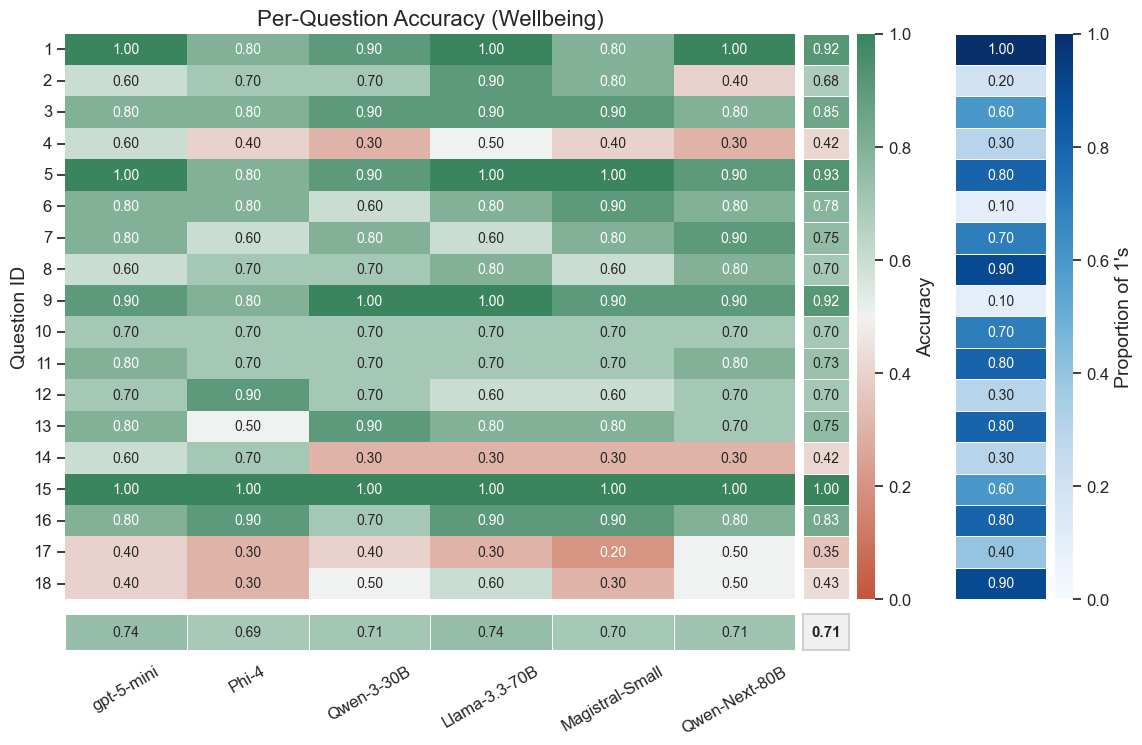

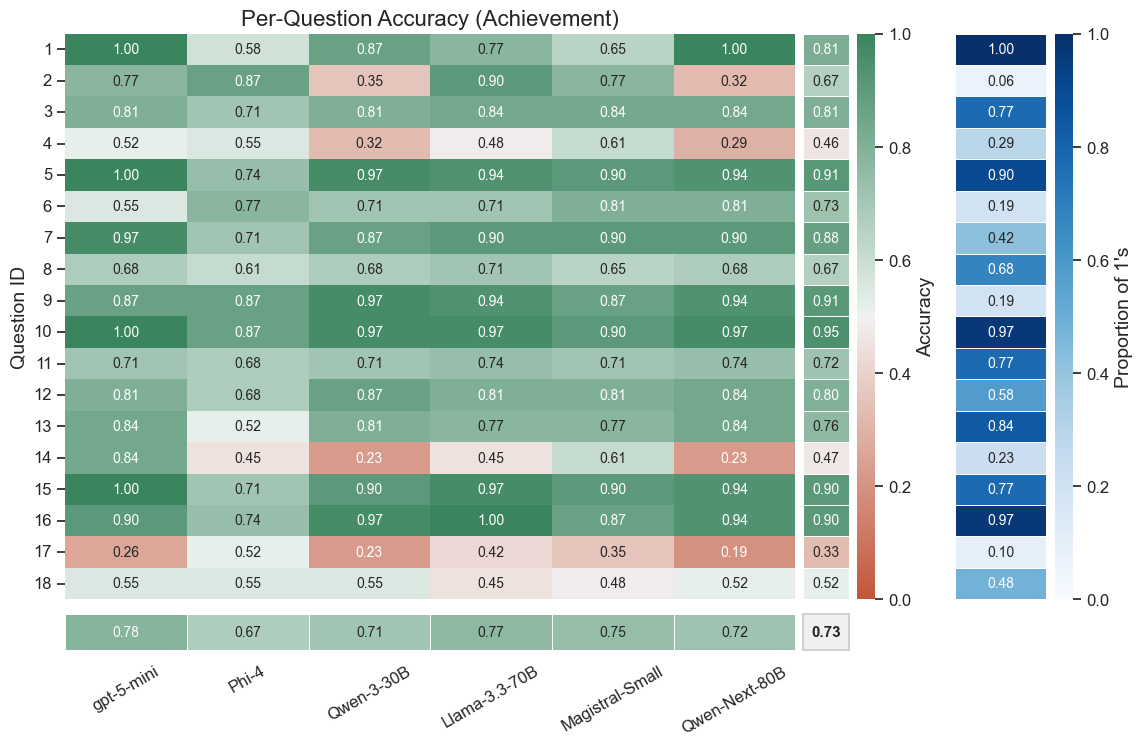

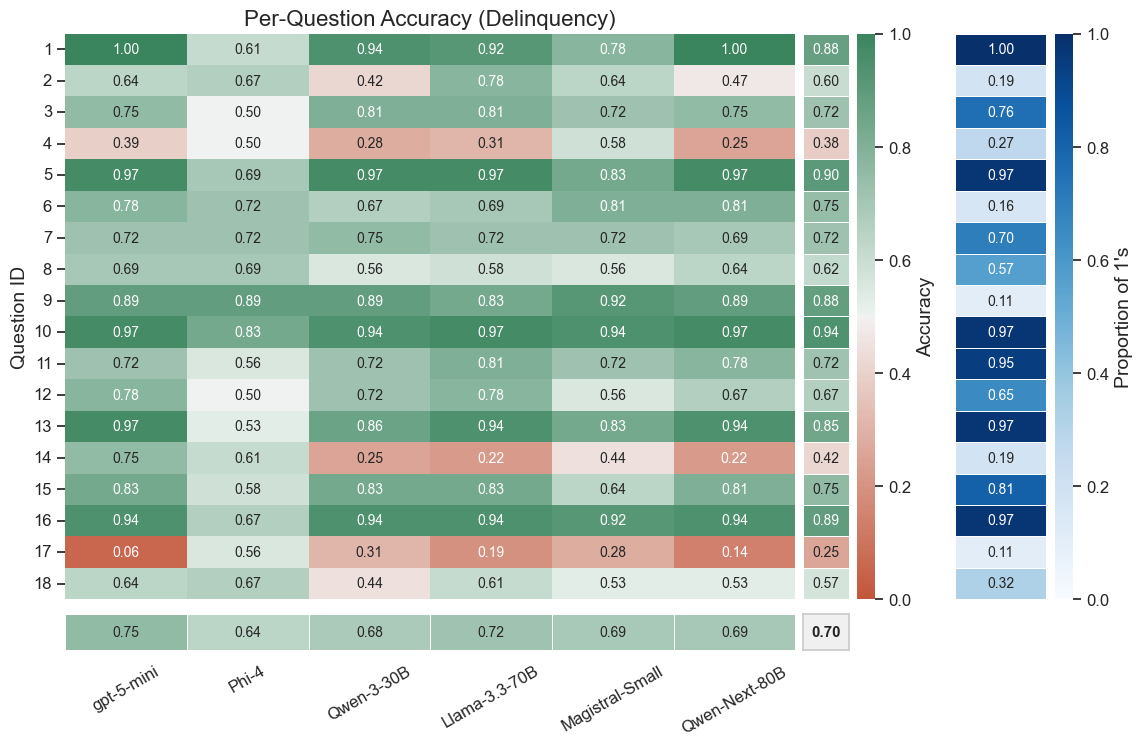

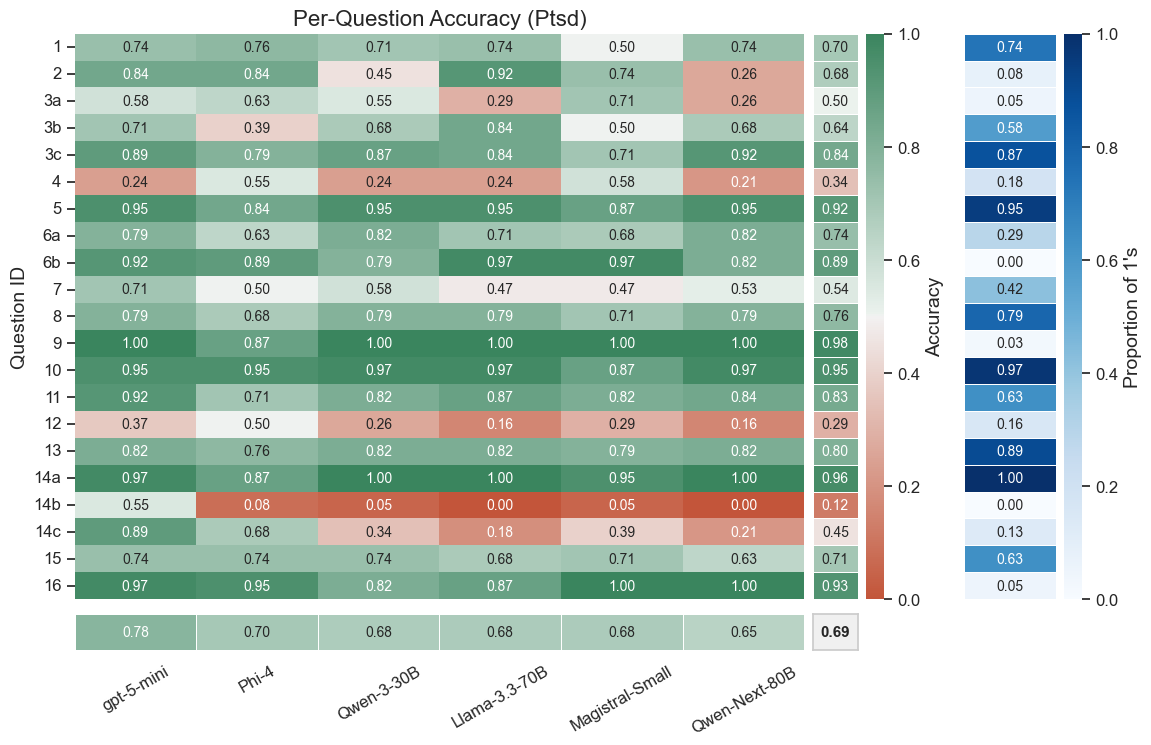

In [155]:
acc_dfs = []
# Load labels
for subfolder in SUBFOLDERS:
    df_labels = pd.read_csv(f"./human_labels/{subfolder}.csv", delimiter=";", dtype=int)
    df_labels = df_labels.melt(
        id_vars=["paper_id"], var_name="question_id", value_name="answer"
    )
    df_labels["paper_id"] = df_labels["paper_id"].astype(int)
    df_labels["question_id"] = df_labels["question_id"].astype(int)
    df_labels["answer"] = df_labels["answer"].astype(int)


    files = [
        f"Qwen_Qwen3-Embedding-8B_gpt-5-mini_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_microsoft_phi-4_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-30B-A3B-Instruct-2507_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_meta-llama_Llama-3.3-70B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_mistralai_Magistral-Small-2509_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
        f"Qwen_Qwen3-Embedding-8B_Qwen_Qwen3-Next-80B-A3B-Instruct_{subfolder}_500_{"0" if subfolder == "ptsd" else "3"}.csv",
    ]
    

    acc_df = load_llm_accuracies_with_human(df_labels, files)
    plot_accuracy_with_human(acc_df, subfolder)
    acc_dfs.append(acc_df)